# Pytorch Computer vision

In [38]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## 1. Getting a dataset

FasshionMNIST


In [39]:
from torchvision import datasets
train_dataset = datasets.FashionMNIST(root="data",
                                      train=True,
                                      download=True,
                                      transform=torchvision.transforms.ToTensor(),
                                      target_transform=None)

test_dataset = datasets.FashionMNIST(root="data",
                                     train=False,
                                     download=True,
                                     transform=torchvision.transforms.ToTensor(),
                                     target_transform=None)

In [40]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [41]:
image, label = train_dataset[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [42]:
class_names = train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [43]:
class_to_idx = train_dataset.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [44]:
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

### 1.2 Visualizing our data

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

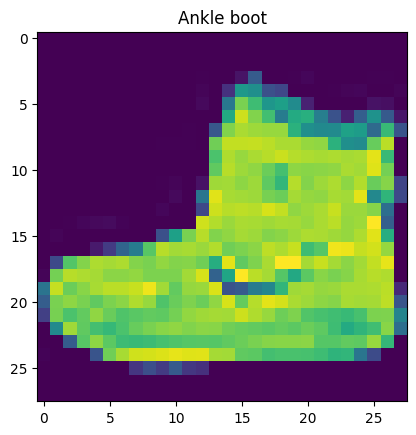

In [45]:
image, label = train_dataset[0]
print(f"image shape: {image.shape}")
plt.imshow(image.reshape(28, 28, 1))
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

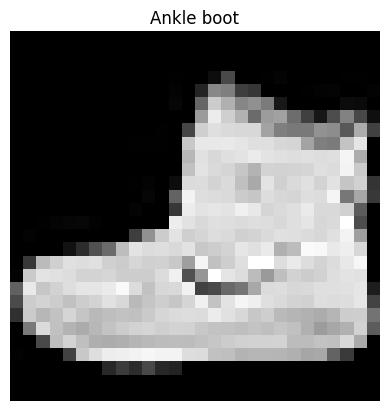

In [46]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

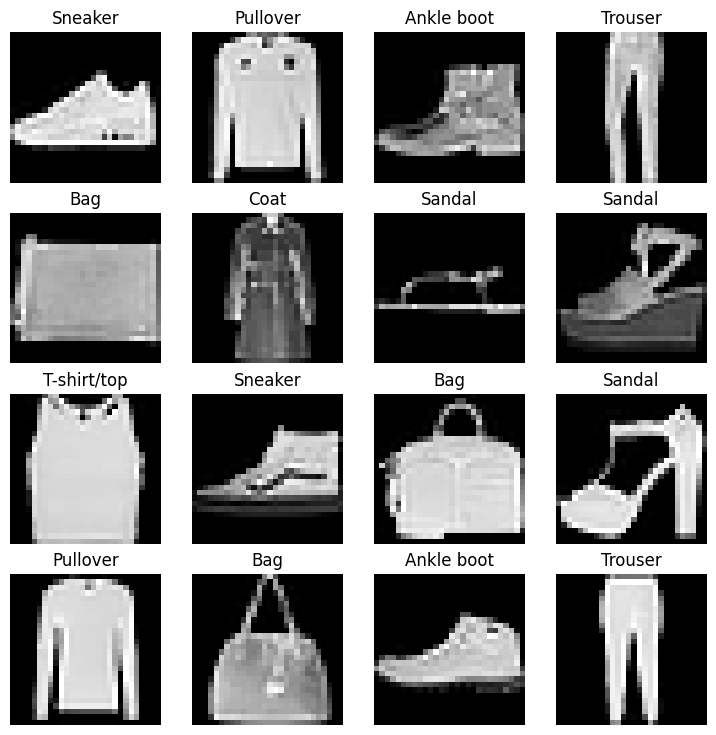

In [47]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
  img, label = train_dataset[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

In [48]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                batch_size=32,
                                                shuffle=True)

test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
                                               batch_size=32,
                                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f4f1c89ee00>,
 <torch.utils.data.dataloader.DataLoader at 0x7f4f1c89db10>)

In [49]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [50]:
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape

torch.Size([32, 1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

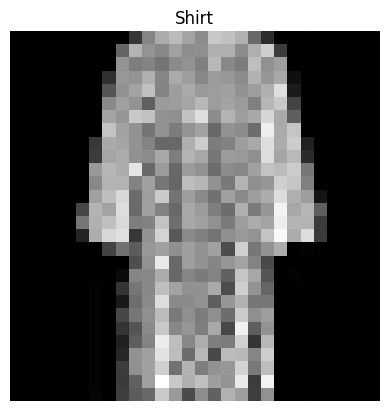

In [51]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## 3. Model 0: Build a basline model

In [52]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
output.shape, x.shape

(torch.Size([1, 784]), torch.Size([1, 28, 28]))

In [53]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [54]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [55]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)

tensor([[-0.3679, -0.2624,  0.2041,  0.2436,  0.2287, -0.2790, -0.4862,  0.2468,
         -0.1927, -0.2186]], grad_fn=<AddmmBackward0>)

In [56]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0299,  0.0352,  0.0045,  ..., -0.0304, -0.0082, -0.0040],
                      [ 0.0173, -0.0138,  0.0164,  ..., -0.0015, -0.0311, -0.0337],
                      [-0.0249, -0.0346,  0.0235,  ...,  0.0249, -0.0034,  0.0353],
                      ...,
                      [ 0.0248,  0.0261, -0.0230,  ...,  0.0165, -0.0191,  0.0061],
                      [-0.0187, -0.0010, -0.0196,  ..., -0.0004,  0.0325,  0.0160],
                      [-0.0074,  0.0242, -0.0288,  ..., -0.0082,  0.0119,  0.0135]])),
             ('layer_stack.1.bias',
              tensor([0.0046, 0.0234, 0.0355, 0.0073, 0.0140, 0.0203, 0.0071, 0.0022, 0.0321,
                      0.0247])),
             ('layer_stack.2.weight',
              tensor([[ 0.2065, -0.1230, -0.1512, -0.1715, -0.2648, -0.0321,  0.1782,  0.0463,
                       -0.1119, -0.0437],
                      [-0.2423, -0.2031,  0.0291, -0.1837,  0.0390,  0.2608,  0.0810,  0.2

### 3.1 Setup loss, optimizer and evaluation metrics

In [57]:
!wget https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/pytorch/helper_functions.py

--2024-05-24 12:29:03--  https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/pytorch/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2024-05-24 12:29:03 (67.4 MB/s) - ‘helper_functions.py.1’ saved [10160/10160]



In [58]:
from helper_functions import accuracy_fn

In [59]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.001)

### 3.2 Creating a function to time our experiments

In [60]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [61]:
start_time = timer()

end_time = timer()
print_train_time(start_time, end_time, "cpu")

Train time on cpu: 0.000 seconds


4.5645000000149594e-05

In [62]:
from tqdm.auto import tqdm

### 3.3 Creating a training loop and training on batches of data

In [63]:
epochs = 3
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  model_0.train()
  losses = 0
  acc = 0
  val_loss = 0
  val_acc = 0
  for batch, (X, y) in enumerate(train_dataloader):
    X = X.to(device)
    y = y.to(device)

    y_logits = model_0(X)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y)
    losses += loss
    acc += accuracy_fn(y, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  losses /= len(train_dataloader)
  acc /= len(train_dataloader)
  model_0.eval()
  with torch.inference_mode():
    for image, label in test_dataloader:
      image = image.to(device)
      label = label.to(device)

      y_logits = model_0(image)
      y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

      val_loss += loss_fn(y_logits, y_pred)
      val_acc += accuracy_fn(label, y_pred)

    val_loss /= len(test_dataloader)
    val_acc /=len(test_dataloader)

  print(f"loss:{losses:.4f}, acc:{acc:.2f}|val_loss:{val_loss:.4f}, val_acc:{val_acc:.2f} ")
train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_time_start,
                                              end=train_time_end,
                                              device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
loss:1.8645, acc:45.90|val_loss:1.2933, val_acc:60.52 
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
loss:1.1939, acc:65.86|val_loss:0.8374, val_acc:67.58 
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
loss:0.9257, acc:69.72|val_loss:0.6562, val_acc:70.23 
Train time on cpu: 32.801 seconds


## 4.Make predictions and get Model 0 results

In [64]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X = X.to(device)
      y = y.to(device)
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc": acc}


model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.8690333962440491,
 'model_acc': 70.2276357827476}

## 5. Setup device agnostic-code

In [65]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [66]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.flatten = nn.Flatten()
    self.layer_1 = nn.Linear(in_features=input_shape, out_features=hidden_units)
    self.layer_2 = nn.Linear(in_features=hidden_units, out_features=output_shape)
    self.relu1 = nn.ReLU()
    self.relu2 = nn.ReLU()

  def forward(self, x):
    x = self.flatten(x)
    x = self.layer_1(x)
    x = self.relu1(x)
    x = self.layer_2(x)
    return self.relu2(x)

model_1 = FashionMNISTModelV1(784, 10, len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer_1): Linear(in_features=784, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (relu1): ReLU()
  (relu2): ReLU()
)

### 6.1 Setup loss, optimizer and evalution metrics

In [67]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loop

In [68]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):

  train_loss, train_acc = 0, 0

  model.train()
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    acc = accuracy_fn(y, y_pred.argmax(dim=1))
    train_loss += loss
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"loss:{train_loss:.4f}, acc:{train_acc:.2f}%")



In [69]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      loss = loss_fn(y_pred, y)
      acc = accuracy_fn(y, y_pred.argmax(dim=1))

      test_loss += loss
      test_acc += acc

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"val_loss:{test_loss:.4f}, val_acc:{test_acc:.2f}%")


In [70]:
epoch = 3
start_timer = timer()
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

for epoch in tqdm(range(epoch)):
  print(f"epoch:{epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer,)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

end_timer = timer()
total_train_time_model_1 = print_train_time(start=start_timer,
                 end=end_timer,
                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
-------
loss:0.9122, acc:68.27%
val_loss:0.7401, val_acc:73.02%
epoch:1
-------
loss:0.6426, acc:77.05%
val_loss:0.4825, val_acc:82.99%
epoch:2
-------
loss:0.4574, acc:83.83%
val_loss:0.4642, val_acc:83.39%
Train time on cpu: 33.566 seconds


In [71]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [72]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4641698896884918,
 'model_acc': 83.38658146964856}

## Model 2: Building a Convolutional Neural Network (CNN)

In [160]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    return x



In [161]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [162]:
dummy_data = torch.randn((32, 1, 28, 28))
model_2(dummy_data)

torch.Size([32, 10, 14, 14])
torch.Size([32, 10, 7, 7])


tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185],
        [ 0.0358, -0.0907,  0.0761, -0.0497,  0.0093,  0.0326,  0.0156, -0.0088,
         -0.0064, -0.0145],
        [ 0.0382, -0.1028,  0.0712, -0.0495,  0.0203,  0.0429,  0.0121,  0.0011,
          0.0042, -0.0220],
        [ 0.0500, -0.0924,  0.0806, -0.0513,  0.0048,  0.0301,  0.0071, -0.0045,
         -0.0129, -0.0192],
        [ 0.0293, -0.0892,  0.0825, -0.0402,  0.0146,  0.0193,  0.0145, -0.0059,
         -0.0084, -0.0123],
        [ 0.0394, -0.0979,  0.0863, -0.0436,  0.0084,  0.0092,  0.0103, -0.0094,
         -0.0225, -0.0086],
        [ 0.0467, -0.0919,  0.0747, -0.0380,  0.0306,  0.0275,  0.0073, -0.0113,
         -0.0018, -0.0296],
        [ 0.0445, -0.0905,  0.0862, -0.0400,  0.0157,  0.0311,  0.0199,  0.0082,
         -0.0191, -0.0138],
        [ 0.0423, -0.1045,  0.0787, -0.0463,  0.0038,  0.0248,  0.0077,  0.0058,
          0.0042, -0.0346],
        [ 0.0305, -

### 7.1 Stepping through `nn.Conv2d`

In [77]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
images.shape, test_image.shape, test_image

(torch.Size([32, 3, 64, 64]),
 torch.Size([3, 64, 64]),
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
          [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
          [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
          ...,
          [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
          [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
          [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],
 
         [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
          [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
          [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
          ...,
          [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
          [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
          [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],
 
         [[-0.7978,  1.0261,  1.1465,  ..., 

In [111]:
conv_layer = nn.Conv2d(in_channels=1,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

In [101]:
image, label = next(iter(train_dataloader))

In [112]:
image_conv = conv_layer(image[0])
image_conv.shape

torch.Size([10, 28, 28])

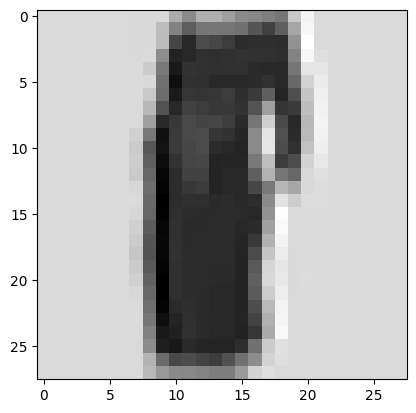

In [121]:
plt.imshow(image_conv[9].detach().numpy(), cmap="gray")

In [93]:
image_conv.shape

torch.Size([32, 10, 26, 26])

In [135]:
image.permute(0, 2, 3, 1).shape

torch.Size([32, 28, 28, 1])

### 7.2 Stepping through `nn.MaxPool2d()`

In [144]:
maxpool_layer = nn.MaxPool2d(kernel_size=2)

In [150]:
mp_img = maxpool_layer(image[0])
mp_img.shape, image[0].shape

(torch.Size([1, 14, 14]), torch.Size([1, 28, 28]))

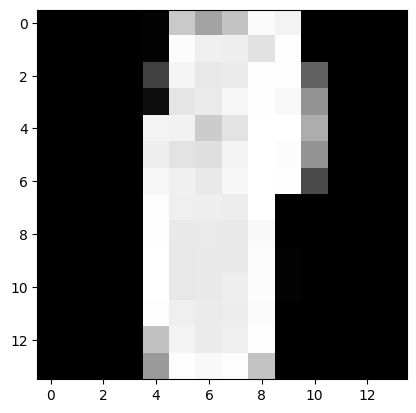

In [149]:
plt.imshow(mp_img.squeeze(), cmap="gray")

### 7.3 Setup a loss function and optimizer

In [164]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.01)

In [165]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      